In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn import metrics
import random
import statistics

In [7]:
df_train = pd.read_csv('acc_vred.csv.gz',
                  compression='gzip',
                  header=0,
                  sep=',',
                  quotechar='"')
df_train

,annual_inc,fico_score,term,loan_amnt,home_ownership,int_rate,all_util,dti
0,0.003442,0.530786,1.0,0.278481,0.666667,0.179907,0.161850,0.00826
1,0.005000,0.828025,0.0,0.189873,0.666667,0.000389,0.248555,0.01553
2,0.009684,0.509554,0.0,0.696203,0.666667,0.100857,0.000000,0.03137
3,0.003273,0.233546,0.0,0.315190,1.000000,0.488707,0.000000,0.00680
4,0.007273,0.573248,1.0,0.518987,0.666667,0.247664,0.000000,0.02169
...,...,...,...,...,...,...,...,...
269355,0.005637,0.276008,1.0,0.594937,0.000000,0.291277,0.294798,0.01546
269356,0.004491,0.318471,1.0,0.351899,1.000000,0.221184,0.369942,0.01485
269357,0.011365,0.254777,1.0,0.797468,0.666667,0.338006,0.260116,0.03089
269358,0.008637,0.467091,1.0,0.908861,0.000000,0.357477,0.456647,0.02250


In [10]:
df_pred_full = pd.read_csv('acc_2_pred_final.csv.gz',
                  compression='gzip',
                  header=0,
                  sep=',',
                  quotechar='"')
df_pred_full.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_w,total_pymnt,funded_amnt,roi
0,0.612658,0.61750,0.0,0.260125,0.472658,0.333333,0.294118,1.000000,0.666667,0.006806,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,25679.660000,24700.0,0.039662
1,0.493671,0.50000,1.0,0.213006,0.245424,0.166667,0.235294,1.000000,0.666667,0.006597,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,22705.924294,20000.0,0.135296
2,0.250633,0.26000,1.0,0.667445,0.161740,0.833333,0.735294,0.363636,0.666667,0.010935,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,11740.500000,10400.0,0.128894
3,0.289873,0.29875,0.0,0.316589,0.229315,0.333333,0.352941,0.454545,0.000000,0.003560,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,13708.948530,11950.0,0.147192
4,0.022785,0.03500,0.0,0.294782,0.019398,0.333333,0.323529,0.363636,0.666667,0.006702,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1575.160698,1400.0,0.125115


In [11]:
df_pred = df_pred_full[list(df_train.columns)]

In [12]:
df_pred

,annual_inc,fico_score,term,loan_amnt,home_ownership,int_rate,all_util,dti
0,0.006806,0.445860,0.0,0.612658,0.666667,0.260125,0.150754,0.01706
1,0.006597,0.360934,1.0,0.493671,0.666667,0.213006,0.331658,0.01178
2,0.010935,0.360934,1.0,0.250633,0.666667,0.667445,0.396985,0.02637
3,0.003560,0.339703,0.0,0.289873,0.000000,0.316589,0.386935,0.01120
4,0.006702,0.382166,0.0,0.022785,0.666667,0.294782,0.341709,0.03595
...,...,...,...,...,...,...,...,...
674044,0.023037,0.445860,1.0,1.000000,0.666667,0.400312,0.140704,0.01188
674045,0.006283,0.297240,0.0,0.367089,0.666667,0.201713,0.185930,0.02740
674046,0.018931,0.403397,1.0,0.731646,0.666667,0.338006,0.346734,0.02303
674047,0.015707,0.233546,1.0,0.392405,0.000000,0.291277,0.381910,0.01325


In [13]:
target_train = pd.read_csv('target_2_train_feateng_dwnsmpl.csv.gz',
                  compression='gzip',
                  header=0,
                  sep=',',
                  quotechar='"')
target_train.loan_status_binary.value_counts()

0    134680
1    134680
Name: loan_status_binary, dtype: int64

In [14]:
target_pred = pd.read_csv('target_2_pred_final.csv.gz',
                  compression='gzip',
                  header=0,
                  sep=',',
                  quotechar='"')
target_pred.loan_status_binary.value_counts()

0    539369
1    134680
Name: loan_status_binary, dtype: int64

In [15]:
df_fund_train= pd.read_csv('acc_fund_info.csv.gz',
                  compression='gzip',
                  header=0,
                  sep=',',
                  quotechar='"')
df_fund_train

,funded_amnt,total_pymnt
0,2000.0,2499.418453
1,6000.0,7025.750091
2,4800.0,6361.003877
3,25000.0,27886.391190
4,8000.0,9448.774393
...,...,...
269355,24000.0,11031.190000
269356,14400.0,3677.170000
269357,32000.0,8403.350000
269358,36400.0,2539.420000


In [16]:
df_fund_pred = df_pred_full[list(df_fund_train.columns)]

In [17]:
df_fund_pred

,funded_amnt,total_pymnt
0,24700.0,25679.660000
1,20000.0,22705.924294
2,10400.0,11740.500000
3,11950.0,13708.948530
4,1400.0,1575.160698
...,...,...
674044,40000.0,42089.416411
674045,15000.0,15908.001163
674046,29400.0,35848.764532
674047,16000.0,18660.607569


In [18]:
df_fund_pred['roi'] = (df_fund_pred.total_pymnt-df_fund_pred.funded_amnt)/df_fund_pred.funded_amnt
df_fund_pred['label'] = target_pred.loan_status_binary
df_fund_pred

/Users/almas/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


,funded_amnt,total_pymnt,roi,label
0,24700.0,25679.660000,0.039662,0
1,20000.0,22705.924294,0.135296,0
2,10400.0,11740.500000,0.128894,0
3,11950.0,13708.948530,0.147192,0
4,1400.0,1575.160698,0.125115,0
...,...,...,...,...
674044,40000.0,42089.416411,0.052235,0
674045,15000.0,15908.001163,0.060533,0
674046,29400.0,35848.764532,0.219346,0
674047,16000.0,18660.607569,0.166288,0


In [19]:
df_fund_pred.describe()

,funded_amnt,total_pymnt,roi,label
count,674049.000000,674049.000000,674049.000000,674049.000000
mean,14399.696387,14812.475528,0.033896,0.199807
std,8703.785691,10338.177714,0.291480,0.399856
min,500.000000,0.000000,-1.000000,0.000000
25%,8000.000000,6837.340000,0.035404,0.000000
50%,12000.000000,12120.801933,0.113155,0.000000
75%,20000.000000,20576.306870,0.187218,0.000000
max,40000.000000,62884.797382,1.170300,1.000000


In [20]:
df_fund_pred.loc[df_fund_pred.label == 1].loc[df_fund_pred.roi > 0]

,funded_amnt,total_pymnt,roi,label
14,16000.0,17396.63,0.087289,1
60,16000.0,19028.76,0.189297,1
165,10400.0,10784.00,0.036923,1
360,5000.0,5256.93,0.051386,1
591,15000.0,16428.53,0.095235,1
...,...,...,...,...
671228,16000.0,17713.57,0.107098,1
672670,5325.0,5331.36,0.001194,1
673227,25000.0,29131.62,0.165265,1
673306,10800.0,23439.24,1.170300,1


In [21]:
df_fund_pred.describe()

,funded_amnt,total_pymnt,roi,label
count,674049.000000,674049.000000,674049.000000,674049.000000
mean,14399.696387,14812.475528,0.033896,0.199807
std,8703.785691,10338.177714,0.291480,0.399856
min,500.000000,0.000000,-1.000000,0.000000
25%,8000.000000,6837.340000,0.035404,0.000000
50%,12000.000000,12120.801933,0.113155,0.000000
75%,20000.000000,20576.306870,0.187218,0.000000
max,40000.000000,62884.797382,1.170300,1.000000


In [22]:
target_train = pd.read_csv('target_2_train_feateng_dwnsmpl.csv.gz',
                  compression='gzip',
                  header=0,
                  sep=',',
                  quotechar='"')
target_train.head()

,loan_status_binary
0,0
1,0
2,0
3,0
4,0


In [23]:
# spliting to train-test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_train, target_train, test_size=0.5, random_state=42)
X_train.head()

,annual_inc,fico_score,term,loan_amnt,home_ownership,int_rate,all_util,dti
199417,0.010910,0.636943,1.0,0.873418,0.666667,0.648754,0.358382,0.01534
75508,0.005091,0.212314,0.0,0.198101,0.666667,0.357477,0.000000,0.01583
154700,0.009923,0.212314,1.0,0.443038,0.666667,0.454829,0.000000,0.02776
143815,0.003819,0.254777,0.0,0.291139,0.000000,0.766355,0.000000,0.02229
34569,0.003182,0.403397,0.0,0.240506,0.666667,0.238707,0.398844,0.02580


In [24]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
gbm = GradientBoostingClassifier()

# roc_auc_score =
grid_para_boost = [{
    "min_samples_leaf": [10],
    "n_estimators":[500],
#     "subsample":[0.25,0.5,1.0],
#     "criterion":["friedman_mse", "mae"],
#     "min_samples_split": np.linspace(start=2, stop=30, num=5, dtype=int),
    "min_samples_split": [30],
    "max_depth": [5]}]

grid_search_boost = GridSearchCV(gbm, grid_para_boost,scoring= 'roc_auc', cv=5, n_jobs = -1, verbose=2)

%time grid_search_boost.fit(X_train, y_train)
print('\ntrain score (ROC_AUC) : %f'%grid_search_boost.best_score_ )
print('-'*70)
print('test score (ROC_AUC) : %f'%grid_search_boost.score(X_test,y_test) )
print('-'*70)
grid_search_boost.best_params_

Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/almas/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


CPU times: user 1min 43s, sys: 1.3 s, total: 1min 44s
Wall time: 3min 35s

train score (ROC_AUC) : 0.708135
----------------------------------------------------------------------
test score (ROC_AUC) : 0.709618
----------------------------------------------------------------------


{'max_depth': 5,
 'min_samples_leaf': 10,
 'min_samples_split': 30,
 'n_estimators': 500}

In [25]:
# printing the confusion matrix for Gradient boost

from sklearn.metrics import confusion_matrix

optimum_gradientBoost = grid_search_boost.best_estimator_
predictions_gb = optimum_gradientBoost.predict(X_test)
labels = y_test
conf_mat = confusion_matrix(labels, predictions_gb)
print ("Gradient boost confusion matrix")
print ('-'*70)
print(conf_mat)

Gradient boost confusion matrix
----------------------------------------------------------------------
[[42684 24445]
 [22420 45131]]


In [26]:
# F1 score 
# F1 = 2 * (precision * recall) / (precision + recall)

f1_score_gb = metrics.f1_score(labels, predictions_gb)
recall_score_gb = metrics.recall_score(labels, predictions_gb)
precision_score_gb = metrics.precision_score(labels, predictions_gb)
print ("Gradient Boost performance")
print ('-'*70)
print('F1 score: {0:0.2f}'.format(f1_score_gb))
print('recall score: {0:0.2f}'.format(recall_score_gb))
print('precision score: {0:0.2f}'.format(precision_score_gb))

Gradient Boost performance
----------------------------------------------------------------------
F1 score: 0.66
recall score: 0.67
precision score: 0.65


In [27]:
# ROC-AUC score
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score

from sklearn.metrics import roc_auc_score
print ("Gradient boost ROC-AUC score")
print ('-'*70)
roc_auc_score(labels, predictions_gb)

Gradient boost ROC-AUC score
----------------------------------------------------------------------


0.6519764981966243

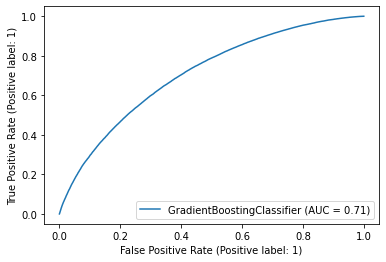

In [28]:
# Receiver operating characteristic (ROC) curve
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_roc_curve.html#sklearn.metrics.plot_roc_curve

from sklearn import metrics
metrics.plot_roc_curve(optimum_gradientBoost, X_test, y_test) 

In [29]:
predictions_gb_pred = optimum_gradientBoost.predict(df_pred)
prediction_df = pd.DataFrame(predictions_gb_pred, columns=['label'])
prediction_df

,label
0,0
1,0
2,1
3,1
4,0
...,...
674044,1
674045,0
674046,1
674047,1


In [30]:
prediction_df.label.value_counts()

0    407235
1    266814
Name: label, dtype: int64

In [31]:
paid_off_index = list(prediction_df.loc[ prediction_df.label== 0,:].index)
all_index = list(df_pred.index)

In [32]:
# Average ROI analysis using our model

n_loans = 5       # number of loans to invest by an average investor
n_iter = 10000      # number of of investors to average over-1
ROI = []
for i in range(n_iter):
    funded = 0
    paid = 0
    random_list = random.sample(paid_off_index, n_loans)
    for j in random_list:
        funded = funded + df_fund_pred.iloc[j,0]
        paid = paid + df_fund_pred.iloc[j,1]
    ROI.append((paid-funded)/funded)
print('-'* 50)
print('average of ROI using our model in percentage :')
print(statistics.mean(ROI)*100)

--------------------------------------------------
average of ROI using our model in percentage :
6.177011103423529


In [33]:
# Average ROI analysis NOT using our model

n_loans = 5       # number of loans to invest by an average investor
n_iter = 10000      # number of of investors to average over-1
ROI_n = []
for i in range(n_iter):
    funded = 0
    paid = 0
    random_list = random.sample(all_index, n_loans)
    for j in random_list:
        funded = funded + df_fund_pred.iloc[j,0]
        paid = paid + df_fund_pred.iloc[j,1]
    ROI_n.append((paid-funded)/funded)
print('-'* 50)
print('average of ROI NOT using our model in percentage :')
print(statistics.mean(ROI_n)*100)

--------------------------------------------------
average of ROI NOT using our model in percentage :
3.0364876413373056


In [34]:
# General ROI analysis using our model
funded = 0
paid = 0
for i in paid_off_index:
        funded = funded + df_fund_pred.iloc[i,0]
        paid = paid + df_fund_pred.iloc[i,1]
ROI = (paid-funded)/funded
print('-'* 50)
print('ROI using our model in percentage :')
print(ROI*100)

--------------------------------------------------
ROI using our model in percentage :
6.2846829900934305


In [35]:
# General ROI analysis NOT using our model
funded = 0
paid = 0
for i in all_index:
        funded = funded + df_fund_pred.iloc[i,0]
        paid = paid + df_fund_pred.iloc[i,1]
ROI = (paid-funded)/funded
print('-'* 50)
print('ROI NOT using our model in percentage :')
print(ROI*100)

--------------------------------------------------
ROI NOT using our model in percentage :
2.8665822504442433


<AxesSubplot:ylabel='Frequency'>

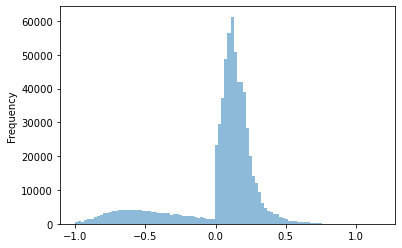

In [36]:
df_fund_pred.roi.plot.hist(bins=100, alpha=0.5)

In [37]:
# Average ROI analysis  for $10,000 investment

n_loans = 2       # number of loans to invest by an average investor
n_iter = 10000      # number of of investors to average over-1
investment = 10000 # investment value in dollars
ROI = []
i=0
while i <= n_iter:
    funded = 0
    paid = 0
    random_list = random.sample(paid_off_index, n_loans)
    for j in random_list:
        funded = funded + df_fund_pred.iloc[j,0]
        paid = paid + df_fund_pred.iloc[j,1]
    if funded <= investment:
        ROI.append((paid-funded)/funded)
        i = i+1

ROI_n = []
i=0
while i <= n_iter:
    funded = 0
    paid = 0
    random_list = random.sample(all_index, n_loans)
    for j in random_list:
        funded = funded + df_fund_pred.iloc[j,0]
        paid = paid + df_fund_pred.iloc[j,1]
    if funded <= investment:
        ROI_n.append((paid-funded)/funded)
        i = i+1
        
        
        
print('-'* 50)
print('average of ROI using our model in percentage :')
print(statistics.mean(ROI)*100)
# print('-'* 50)
print('average of ROI NOT using our model in percentage :')
print(statistics.mean(ROI_n)*100)

--------------------------------------------------
average of ROI using our model in percentage :
5.904945129434594
average of ROI NOT using our model in percentage :
5.112898019761411


In [38]:
# Average ROI analysis  for different investment ranges 

for n in [10000,20000,30000,40000,50000]:
    n_loans = 4       # number of loans to invest by an average investor
    n_iter = 10000      # number of of investors to average over-1
    investment_low = n
    investment_high = n+10000  # investment value in dollars
    ROI = []
    i=0
    while i <= n_iter:
        funded = 0
        paid = 0
        random_list = random.sample(paid_off_index, n_loans)
        for j in random_list:
            funded = funded + df_fund_pred.iloc[j,0]
            paid = paid + df_fund_pred.iloc[j,1]
        if funded <= investment_high and funded >= investment_low:
            ROI.append((paid-funded)/funded)
            i = i+1

    ROI_n = []
    i=0
    while i <= n_iter:
        funded = 0
        paid = 0
        random_list = random.sample(all_index, n_loans)
        for j in random_list:
            funded = funded + df_fund_pred.iloc[j,0]
            paid = paid + df_fund_pred.iloc[j,1]
        if funded <= investment_high and funded >= investment_low:
            ROI_n.append((paid-funded)/funded)
            i = i+1
    print('-'* 50)
    print('average of ROI for $%d investement using our model in percentage :'%n) 
    print(statistics.mean(ROI)*100)
#   print('-'* 50)
    print('average of ROI for $%d investement NOT using our model in percentage :'%n )
    print(statistics.mean(ROI_n)*100)  

--------------------------------------------------
average of ROI for $10000 investement using our model in percentage :
5.916366795412303
average of ROI for $10000 investement NOT using our model in percentage :
4.561658161100201
--------------------------------------------------
average of ROI for $20000 investement using our model in percentage :
6.155466343224883
average of ROI for $20000 investement NOT using our model in percentage :
3.9193335302864356
--------------------------------------------------
average of ROI for $30000 investement using our model in percentage :
6.005466541716171
average of ROI for $30000 investement NOT using our model in percentage :
3.3697705065588965
--------------------------------------------------
average of ROI for $40000 investement using our model in percentage :
6.337894464956581
average of ROI for $40000 investement NOT using our model in percentage :
3.417764709700466
--------------------------------------------------
average of ROI for $500